In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
import nltk
nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [3]:
#Load the data
from google.colab import files
files.upload()

Saving 1429_1.csv to 1429_1.csv


In [4]:
amz_reviews = pd.read_csv("1429_1.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
amz_reviews.shape
(34660, 21)

amz_reviews.columns
(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity'
       'reviews.userProvince', 'reviews.username']),
      

(['id',
  'name',
  'asins',
  'brand',
  'categories',
  'keys',
  'manufacturer',
  'reviews.date',
  'reviews.dateAdded',
  'reviews.dateSeen',
  'reviews.didPurchase',
  'reviews.doRecommend',
  'reviews.id',
  'reviews.numHelpful',
  'reviews.rating',
  'reviews.sourceURLs',
  'reviews.text',
  'reviews.title',
  'reviews.userCityreviews.userProvince',
  'reviews.username'],)

In [12]:
columns = ['id','name','keys','manufacturer','reviews.dateAdded', 'reviews.date','reviews.didPurchase',
          'reviews.userCity', 'reviews.userProvince', 'reviews.dateSeen', 'reviews.doRecommend','asins',
          'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs', 'reviews.title']

df = pd.DataFrame(amz_reviews.drop(columns,axis=1,inplace=False))

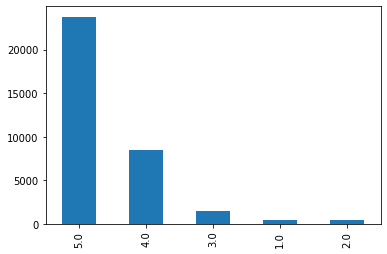

In [13]:
df['reviews.rating'].value_counts().plot(kind='bar')

In [15]:
#Data pre-processing for textual variables
#Lowercasing

## Change the reviews type to string
df['reviews.text'] = df['reviews.text'].astype(str)

## Before lowercasing 
df['reviews.text'][2]
'Inexpensive IPad for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it ...'

## Lowercase all reviews
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['reviews.text'][2] ## to see the difference
'inexpensive IPad for him to use and learn on, step up from the nabi. he was thrilled with it, learn how to skype on it already...'

'inexpensive IPad for him to use and learn on, step up from the nabi. he was thrilled with it, learn how to skype on it already...'

In [16]:
## remove punctuation
df['reviews.text'] = df['reviews.text'].str.replace('[^ws]','')
df['reviews.text'][2]
'inexpensive IPad for him to use and learn on step up from the nabi he was thrilled with it learn how to skype on it already'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


'inexpensive tablet for him to use and learn on step up from the nabi he was thrilled with it learn how to skype on it already'

In [22]:
#Stopwords
 import nltk
nltk.download("stopwords")
stop = stopwords.words('english')
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['reviews.text'][2]
'inexpensive IPad use learn step nabi thrilled learn skype already'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'inexpensive IPad use learn step nabi thrilled learn skype already'

In [23]:
#Stemming
st = PorterStemmer()
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['reviews.text'][2]
'inexpens IPad use learn step nabi thrill learn skype alreadi'

'inexpens IPad use learn step nabi thrill learn skype alreadi'

In [27]:
#Sentiment Score
## Define a function which can be applied to calculate the score for the whole dataset

def senti(x):
    return TextBlob(x).sentiment  

df['senti_score'] = df['reviews.text'].apply(senti)

df.senti_score.head()                                  


0    (0.0, 0.0)
1    (0.0, 0.0)
2    (0.0, 0.0)
3    (0.0, 0.0)
4    (0.0, 0.0)
Name: senti_score, dtype: object

In [ ]:
#As it can be observed there are two scores: the first score is sentiment polarity which tells if the sentiment 
# is positive or negative and the second score is subjectivity score to tell how subjective is the text.
